In [30]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
price_df = pd.read_csv('train_set_nostandard.csv')
price_df.rename(columns={'date':'ds','predict':'y'},inplace=True)
price_df['ds'] = pd.to_datetime(price_df['ds'])
#modify 0 in columns y
# for i in range(len(price_df.iloc[:,-1])):
#     price_df.iloc[i,-1] += 1    
# print([i for i in price_df['y'] if i == 0])

# price_df['y_orig'] = price_df['y']
# price_df['y'] = np.log(price_df['y'])
# print(price_df.head(2))

In [41]:
model = Prophet(daily_seasonality=True) 
model.fit(price_df)

D:\Anaconda\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [42]:
future_data = model.make_future_dataframe(periods=575, freq = 'd')
# periods can be changed, the better is 6-10
forecast_data = model.predict(future_data)

In [43]:
forecast_data.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5747,2018-05-29,1.123686,-0.526629,3.008784,-0.435606,3.081614,-0.034763,-0.034763,-0.034763,-0.014343,...,-0.000035,-0.000035,-0.000035,-0.020386,-0.020386,-0.020386,0.0,0.0,0.0,1.088923
5748,2018-05-30,1.124288,-0.519261,3.026303,-0.438203,3.081336,-0.034533,-0.034533,-0.034533,-0.014343,...,-0.000581,-0.000581,-0.000581,-0.019609,-0.019609,-0.019609,0.0,0.0,0.0,1.089755


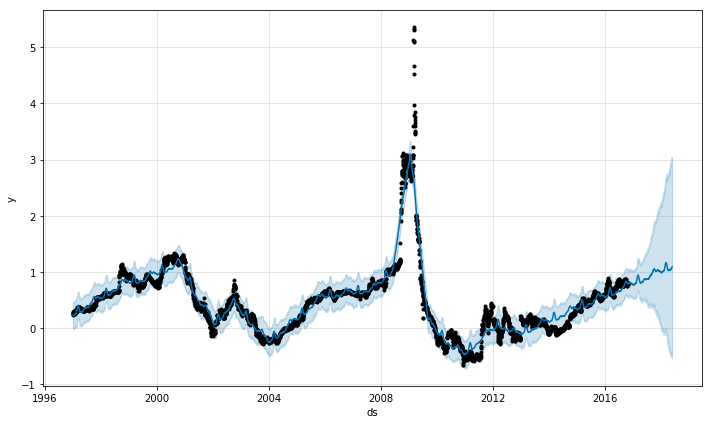

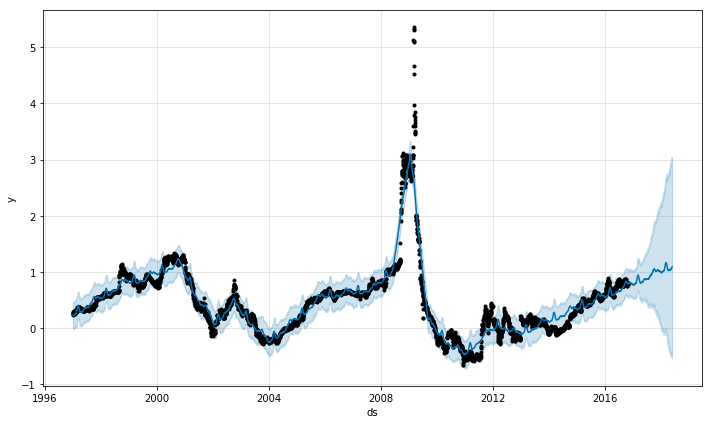

In [44]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
model.plot(forecast_data)

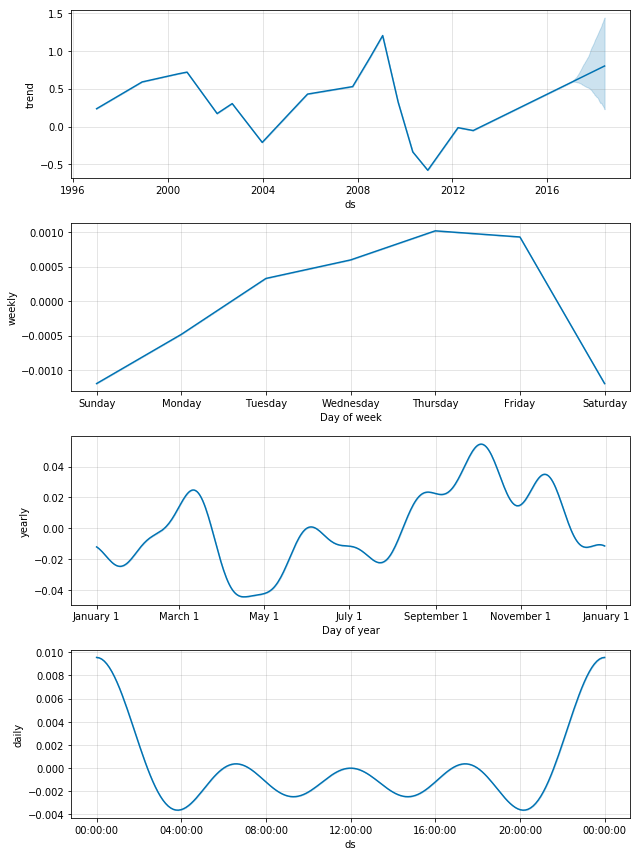

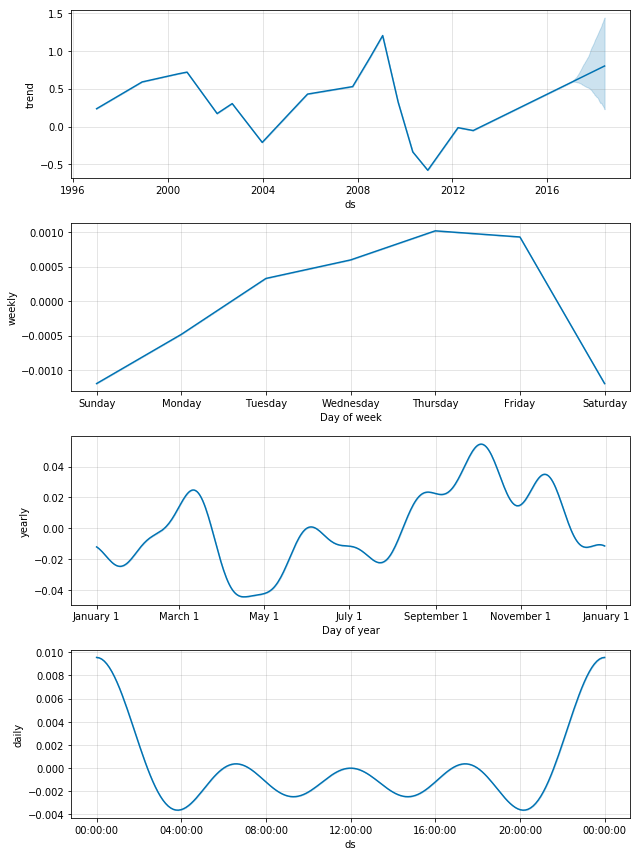

In [21]:
model.plot_components(forecast_data)

In [45]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])-1
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])-1
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])-1

In [46]:
price_df['y_log']=price_df['y'] 
price_df['y']=price_df['y_orig'] 

KeyError: 'y_orig'

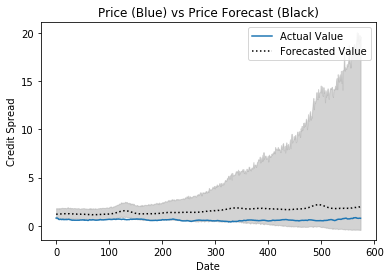

In [47]:
price_t_df = pd.read_csv('test_set_nostandard.csv')
real_price = price_t_df['predict']

fig, ax1 = plt.subplots()
ax1.plot(price_t_df.index,real_price)
ax1.plot(price_t_df.index,forecast_data_orig.loc[len(price_df):,'yhat'], color='black', linestyle=':')
ax1.fill_between(price_t_df.index, forecast_data_orig.loc[len(price_df):,'yhat_lower'], forecast_data_orig.loc[len(price_df):,'yhat_upper'], alpha=0.5, color='darkgray')
ax1.set_title('Price (Blue) vs Price Forecast (Black)')
ax1.set_ylabel('Credit Spread')
ax1.set_xlabel('Date')
L=ax1.legend() 
L.get_texts()[0].set_text('Actual Value') 
L.get_texts()[1].set_text('Forecasted Value')

In [50]:
price_t_df = pd.read_csv('test_set_nostandard.csv')

price_t_df.rename(columns={'date':'ds','predict':'y'},inplace=True)
price_t_df['y_orig']=price_t_df['y'] # We want to save the original data for later use
price_t_df['y'] = np.log(price_t_df['y']+1) #take the log of the data to remove trends, etc
print(price_t_df.head(2))

model = Prophet()
model.fit(price_t_df);

#create 12 months of future data
future_data = model.make_future_dataframe(periods=12, freq = 'm')

#forecast the data for future data
forecast_data = model.predict(future_data)

D:\Anaconda\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds  T10Y3M  curvature  BAMLCC0A1AAATRIV  DPRIME  VIXCLS  \
0  2016/11/2    1.44      -0.56            611.44     3.5   19.32   
1  2016/11/3    1.44      -0.58            609.71     3.5   22.08   

          DJIA        SP500   mktrf     smb  ...   DFF  NASDAQCOM    DTWEXB  \
0  17959.64063  2097.939941 -0.0073 -0.0066  ...  0.41    5105.57  123.1609   
1  17930.66992  2088.659912 -0.0040 -0.0047  ...  0.41    5058.41  123.0173   

   TEDRATE  USD3MTD156N  USEPUINDXD  WILL5000INDFC  WILLRESIND         y  \
0     0.52      0.87567       60.79          94.67      945.58  0.593327   
1     0.51      0.88094       63.05          94.27      939.40  0.598837   

   y_orig  
0    0.81  
1    0.82  

[2 rows x 28 columns]


D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [25]:
# model.plot(forecast_data)

In [48]:
forecast_data=forecast_data.set_index('ds')
viz_df = price_df.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df.set_index('ds')
del viz_df['y']
#del viz_df['index']

In [49]:
price_t_df.index=price_t_df.ds
price_t_df.index = pd.to_datetime(price_t_df.index)
last_date = price_t_df.index[-1]

AttributeError: 'DataFrame' object has no attribute 'ds'

In [43]:
from datetime import date,timedelta
import matplotlib.pyplot as plt

def plot_data(func_df, end_date):
    end_date = end_date - timedelta(weeks=4) 
    mask = (func_df.index > end_date) 
    predict_df = func_df.loc[mask] 

    fig, ax1 = plt.subplots()
    ax1.plot(price_t_df.y_orig)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Price (Orange) vs Price Forecast (Black)')
    ax1.set_ylabel('Dollar Price')
    ax1.set_xlabel('Date')

    L=ax1.legend() 
    L.get_texts()[0].set_text('Actual Price') 
    L.get_texts()[1].set_text('Forecasted Price')

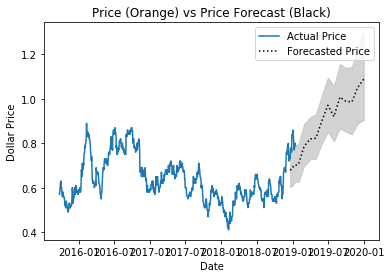

In [44]:
plot_data(forecast_data,last_date)